### FACEBOOK stock prices from quantopian quandl
How to get the data?
https://blog.quandl.com/getting-started-with-the-quandl-api

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from zipline.data.data_portal import DataPortal
from zipline.data import bundles
from zipline.utils.calendars import get_calendar

In [4]:
bundle_data = bundles.load("quantopian-quandl")

In [5]:
print(type(bundle_data))

<class 'zipline.data.bundles.core.BundleData'>


In [6]:
end_date = pd.Timestamp("2019-05-01", tz="utc")

In [8]:
bundle_data.equity_daily_bar_reader.first_trading_day

Timestamp('1990-01-02 00:00:00+0000', tz='UTC')

In [9]:
data_por = DataPortal(
        asset_finder=bundle_data.asset_finder,
        trading_calendar=get_calendar("NYSE"),
        first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
        equity_daily_reader=bundle_data.equity_daily_bar_reader
)    

In [10]:
FB = data_por.asset_finder.lookup_symbol(
    "FB",
    as_of_date=None)

In [11]:
df = data_por.get_history_window(
    assets=[FB],
    end_dt=end_date,
    bar_count=31 * 12,
    frequency='1d',
    data_frequency='daily',
    field='open'
)

C:\Users\ASUS\Anaconda3\envs\tradebot\lib\site-packages\zipline\data\history_loader.py:275: RuntimeWarning: invalid value encountered in rint
  self.current = next(window)


In [12]:
df.head()

,Equity(1037 [FB])
2017-11-06 00:00:00+00:00,178.56
2017-11-07 00:00:00+00:00,180.50
2017-11-08 00:00:00+00:00,NaN
2017-11-09 00:00:00+00:00,178.31
2017-11-10 00:00:00+00:00,178.35


In [13]:
df.describe()

,Equity(1037 [FB])
count,96.000000
mean,179.601042
std,5.999242
min,156.310000
25%,177.120000
50%,179.205000
75%,183.307500
max,192.040000


In [14]:
df.index = pd.DatetimeIndex(df.index)

In [15]:
type(df)

pandas.core.frame.DataFrame

In [17]:
type(df.columns)

pandas.core.indexes.base.Index

In [18]:
list(df.columns)[0]

Equity(1037 [FB])

In [22]:
list(df.columns)

[Equity(1037 [FB]), 'open']

In [19]:
df['open'] = df[list(df.columns)[0]]

In [20]:
df.head()

,Equity(1037 [FB]),open
2017-11-06 00:00:00+00:00,178.56,178.56
2017-11-07 00:00:00+00:00,180.50,180.50
2017-11-08 00:00:00+00:00,NaN,NaN
2017-11-09 00:00:00+00:00,178.31,178.31
2017-11-10 00:00:00+00:00,178.35,178.35


In [23]:
df = df.drop(columns=[list(df.columns)[0]])

In [24]:
df.head()

,open
2017-11-06 00:00:00+00:00,178.56
2017-11-07 00:00:00+00:00,180.50
2017-11-08 00:00:00+00:00,NaN
2017-11-09 00:00:00+00:00,178.31
2017-11-10 00:00:00+00:00,178.35


In [25]:
df

,open
2017-11-06 00:00:00+00:00,178.56
2017-11-07 00:00:00+00:00,180.50
2017-11-08 00:00:00+00:00,NaN
2017-11-09 00:00:00+00:00,178.31
2017-11-10 00:00:00+00:00,178.35
2017-11-13 00:00:00+00:00,177.50
2017-11-14 00:00:00+00:00,178.13
2017-11-15 00:00:00+00:00,176.66
2017-11-16 00:00:00+00:00,178.76
2017-11-17 00:00:00+00:00,179.30


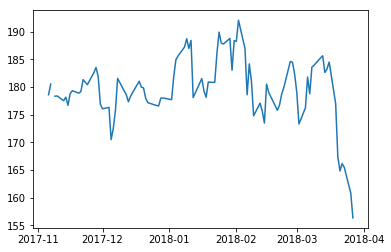

In [26]:
fig, ax = plt.subplots()

ax.plot(df.index, df.open)

# FACEBOOK DATA FROM YAHOO FINANCE

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/ASUS/Desktop/FMI/Licenta OB/Overall Code/packtpub-src/csv/FB.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-30,151.970001,152.899994,151.639999,152.380005,152.380005,13226000
1,2017-05-31,152.699997,153.350006,151.089996,151.460007,151.460007,18023900
2,2017-06-01,151.750000,152.289993,150.300003,151.529999,151.529999,14530600
3,2017-06-02,151.850006,153.630005,151.300003,153.610001,153.610001,16854400
4,2017-06-05,153.639999,154.710007,153.410004,153.630005,153.630005,12520400


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
497,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
498,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9213800
499,2019-05-23,182.419998,183.899994,179.669998,180.869995,180.869995,12768800
500,2019-05-24,182.330002,183.630005,180.830002,181.059998,181.059998,8807700
501,2019-05-28,181.539993,184.710007,181.449997,184.309998,184.309998,14832200


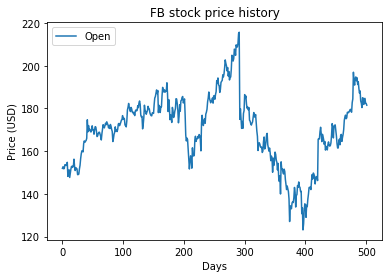

In [5]:
plt.figure()
plt.title("FB stock price history")
plt.plot(df['Open'])
#plt.plot(df["Close"])
#plt.plot(df["High"])
#plt.plot(df["Low"])
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open', 'Close', 'High', 'Low'], loc='upper left')
plt.show()

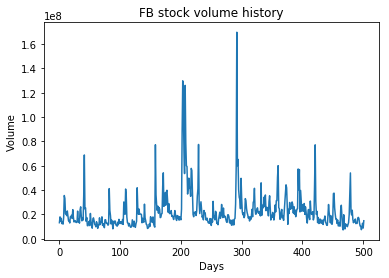

In [6]:
plt.figure()
plt.plot(df['Volume'])
plt.title('FB stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [7]:
print('Checking if any null values are present\n', df.isna().sum())

('Checking if any null values are present\n', Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64)


### Normalizing the data
* Split the data into train, test
* Normalize
* Covert the DataFrame to ndarray


In [8]:
! pip install keras
! pip install np_utils

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [1]:
! pip install tensorflow

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
  Could not find a version that satisfies the requirement tensorflow (from versions: )
No matching distribution found for tensorflow


In [9]:
from tqdm._tqdm_notebook import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras import optimizers
from keras import backend as K
print('Checking GPU available', K.tensorflow_backend._get_available_gpus())


Using TensorFlow backend.


ImportError: No module named tensorflow

In [28]:
TIME_STEPS = 60
BATCH_SIZE = 20

In [30]:


train_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)
print('Train and test set', len(df_train), len(df_test))

#scale the feature MinMax, build array
x = df_train.loc[:, train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:, train_cols])

('Train and test set', 401, 101)


In [34]:
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total nb of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    
    print('length of time-series i/o', x.shape, y.shape)
    return x, y

In [35]:
def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that is divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0] % batch_size
    if no_of_rows_drop > 0:
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [36]:
x_t, y_t = build_timeseries(x_train, 3)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)

x_temp, y_temp = build_timeseries(x_test, 3)
x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE), 2)
y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE), 2)


('length of time-series i/o', (341L, 60L, 5L), (341L,))



('length of time-series i/o', (41L, 60L, 5L), (41L,))


In [37]:
def create_model():
    lstm_model = Sequential()
    # (batch_size, time_steps, data_dim)
    lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]),
                       dropout=0.0, recurrent_dropout=0.0, stateful=True, return_sequences=True,
                       kernel_initializer='random_uniform'))
    lstm_model.add(Dropout(0.4))
    lstm_model.add(LSTM(60, dropout=0.0))
    lstm_model.add(Dropout(0.4))
    lstm_model.add(Dense(20, activation='relu'))
    lstm_model.add(Dense(1, activation='linear'))
    optimizer = optimizer.RMSprop(lr=params['lr'])
    lstm_model.compile(loss='mean_squarred_error', optimizer=optimizer)
    return lstm_model

In [39]:
model = create_model()

#csv_logger = CSVLogger()

history = model.fit(x_t, y_t, epochs=params['epochs'], verbose=2, batch_size=BATCH_SIZE,
                   shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE), 
                                                   trim_dataset(y_val, BATCH_SIZE))) #,callbacks=[es, mcp, csv_logger]

NameError: global name 'Sequential' is not defined